In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.insert(0, "../src")

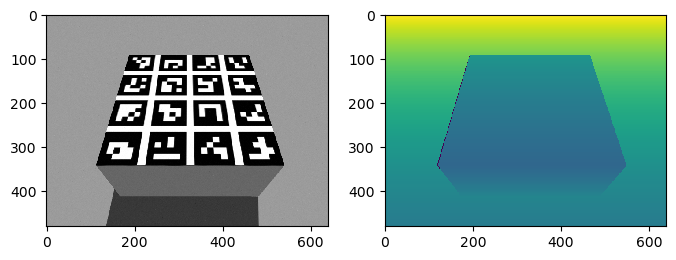

In [20]:
from camera import (
    move_camera_pos,
    get_camera_image_rgb,
    get_camera_image_depth,
)
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import rospy

rospy.init_node("camera_test")
move_camera_pos(-1, 0, 1.5, pitch=0.9)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(get_camera_image_rgb())
ax[1].imshow(get_camera_image_depth())
plt.show()

https://mecaruco2.readthedocs.io/en/latest/notebooks_rst/Aruco/aruco_basics.html

In [24]:
rgb = get_camera_image_rgb()

gray = cv.cvtColor(rgb, cv.COLOR_BGR2GRAY)
aruco_dict = cv.aruco.Dictionary_get(cv.aruco.DICT_4X4_50)
parameters = cv.aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = cv.aruco.detectMarkers(
    gray, aruco_dict, parameters=parameters
)
frame_markers = cv.aruco.drawDetectedMarkers(rgb.copy(), corners, ids)

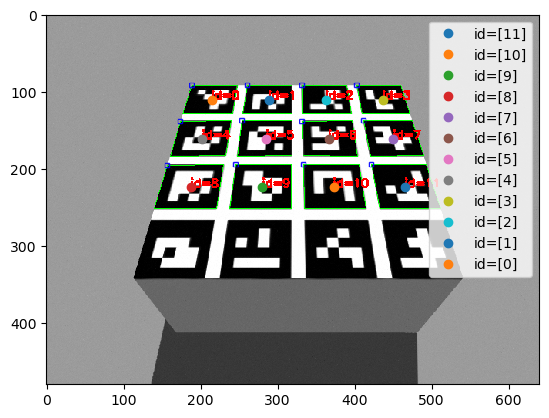

In [25]:
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label="id={0}".format(ids[i]))
plt.legend()
plt.show()